In [115]:
from matplotlib import pyplot as plt
import numpy as np
import librosa
from librosa import display


/Users/akira/anaconda3/lib/python3.6/site-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


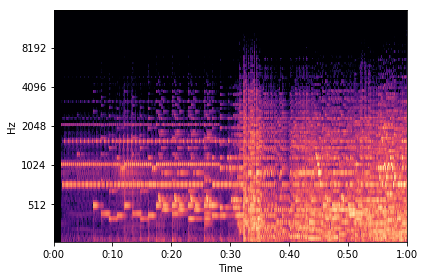

In [116]:
prpre
n_fft = 1024
hop_length = int(librosa.time_to_samples(1./500, sr=sr))
lag = 2
n_mels = 138
fmin = 27.5
fmax = 16000.
max_size = 3
anal_interval = (0,20)
S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft,
                                   hop_length=hop_length,
                                   fmin=fmin,
                                   fmax=fmax,
                                   n_mels=n_mels)


plt.figure(figsize=(6, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                         y_axis='mel', x_axis='time', sr=sr,
                         hop_length=hop_length, fmin=fmin, fmax=fmax)
plt.tight_layout()

/Users/akira/anaconda3/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


(0, 20)

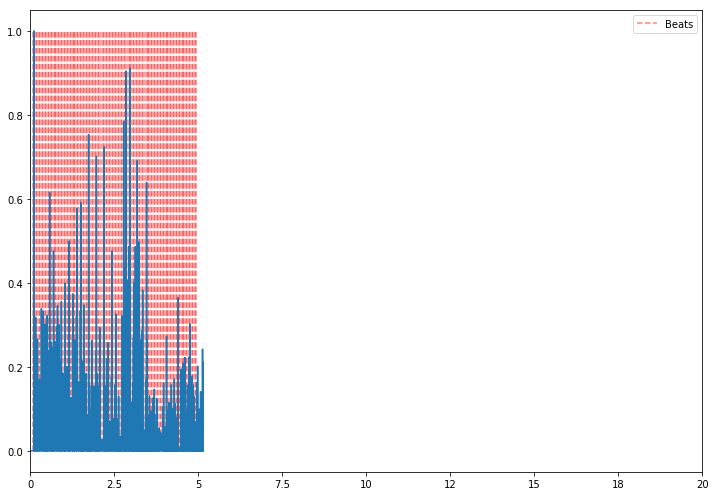

In [117]:
#Beat tracking
onset_env = librosa.onset.onset_strength(y, 
                                         sr=sr,
                                         aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr = sr)
timestamps = librosa.frames_to_time(np.arange(len(onset_env)),
                                sr=sr, hop_length=hop_length)
hop_length = 512
plt.figure(figsize=(10,7))
plt.plot(timestamps, librosa.util.normalize(onset_env))
plt.vlines(timestamps[beats], 0, 1, 
           alpha=0.5, color='r', linestyle='--', 
           label='Beats')
plt.legend(frameon=True, framealpha=0.75)
plt.gca().xaxis.set_major_formatter(display.TimeFormatter())
plt.tight_layout()
plt.xlim(anal_interval)

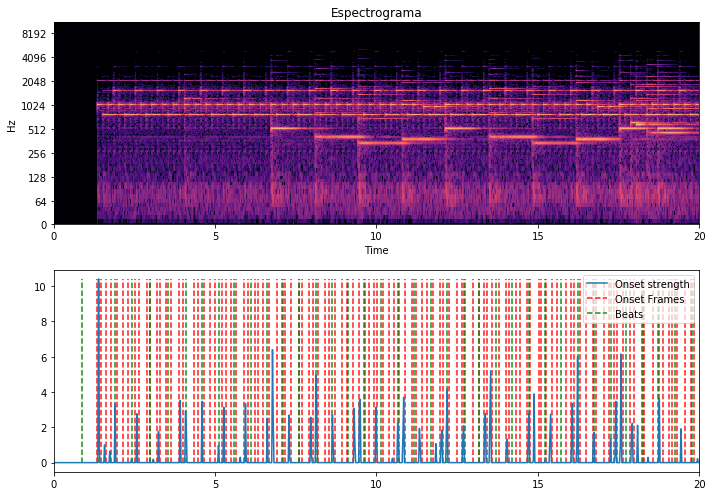

In [118]:
onset_frames = librosa.onset.onset_detect(y, sr=sr, backtrack=True)
onset_envelope = librosa.onset.onset_strength(y, sr=sr,aggregate=np.median)
times = librosa.frames_to_time(np.arange(len(onset_envelope)), sr=sr)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_envelope, sr = sr)

D = np.abs(librosa.stft(y))
plt.figure(figsize=(10,7))
ax1 = plt.subplot(2,1,1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis = 'time', y_axis = 'log')
plt.title('Espectrograma')
plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(times, onset_envelope, label='Onset strength')
plt.vlines(times[onset_frames], 0, onset_envelope.max(), color='r', alpha=0.9,  linestyle='--', label='Onset Frames')
plt.vlines(times[beats], 0, onset_envelope.max(), color='g', alpha=0.9,linestyle='--', label='Beats')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)
plt.xlim(anal_interval)
plt.tight_layout()

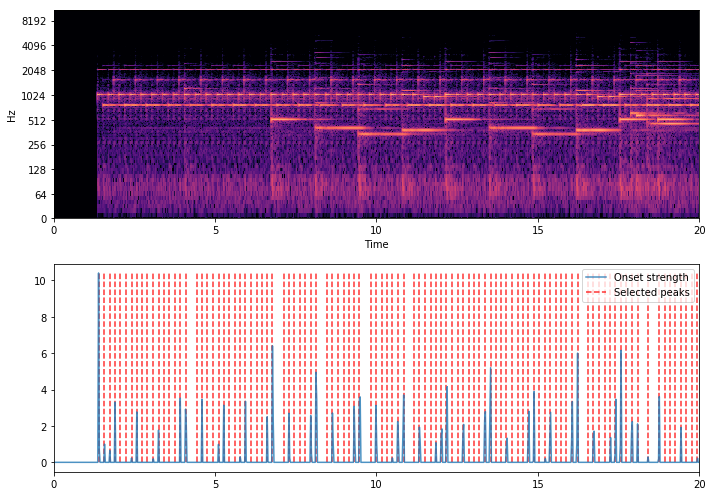

In [119]:
onset_envelope = librosa.onset.onset_strength(y, sr=sr)
peaks = librosa.util.peak_pick(onset_envelope, 3, 3, 8, 8, 0.2, 1)
plt.figure(figsize=(10,7))
ax = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                          y_axis='log', x_axis='time')
plt.subplot(2, 1, 2, sharex=ax)
plt.plot(times, onset_env, alpha=0.8, label='Onset strength')
plt.vlines(times[peaks], 0,
            onset_env.max(), color='r', alpha=0.8,
            label='Selected peaks', linestyle='--')
plt.legend(frameon=True, framealpha=0.8)
plt.axis('tight')
plt.xlim(anal_interval)
plt.tight_layout()